<a href="https://colab.research.google.com/github/Megh-Zyke/Neural-Network-models/blob/main/Image%20Recognition%20Functions/Recognising_Features_using_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import misc

In [11]:
image = misc.ascent()
image.shape

<ipython-input-11-e7e39d534c9f>:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent()


(512, 512)

<function matplotlib.pyplot.show(close=None, block=None)>

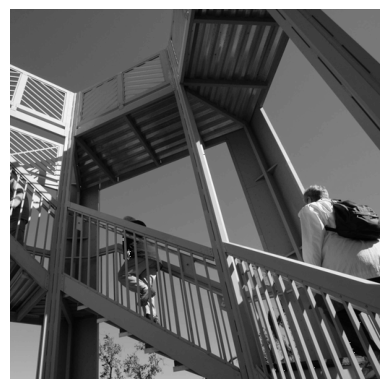

In [9]:
plt.grid(False)
plt.axis('off')
plt.imshow(image)
plt.show

In [10]:
image_transform = np.copy(image)

size_x = image_transform.shape[0]
size_y = image_transform.shape[1]

print(size_x , size_y)

512 512


In [12]:
filter_1 = [[0,1,0] , [1,-4,1] ,[0,1,0]]
filter_2 = [ [-1,-2,-1] ,[0,0,0] , [1,2,1]]
filter_3  = [[-1 , 0 ,-1] , [-2 , 0 , 2 ], [ -1 , 0 , 1]]

In [13]:
weight = 1

In [22]:
def conv2D( image, filter):
  X = image.shape[0]
  Y = image.shape[1]
  image_new = np.copy(image)
  for x in range(1 , X - 1):
    for y in range(1,Y-1):
      convolution = 0.
      convolution += image[x-1,y-1] * filter[0][0]
      convolution += image[x-1,y] * filter[0][1]
      convolution += image[x-1,y+1] * filter[0][2]

      convolution += image[x,y-1] * filter[1][0]
      convolution += image[x,y] * filter[1][1]
      convolution += image[x,y+1] * filter[1][2]


      convolution += image[x+1,y-1] * filter[2][0]
      convolution += image[x+1,y] * filter[2][1]
      convolution += image[x+1,y+1] * filter[2][2]

      convolution *= weight


      convolution = 0 if convolution == 0 else (255 if convolution > 255 else convolution)

      image_new[x][y] = convolution
  return image_new


In [23]:
i = conv2D(image,filter_1)
i_2 = conv2D(image , filter_2)
i_3 = conv2D(image , filter_3)

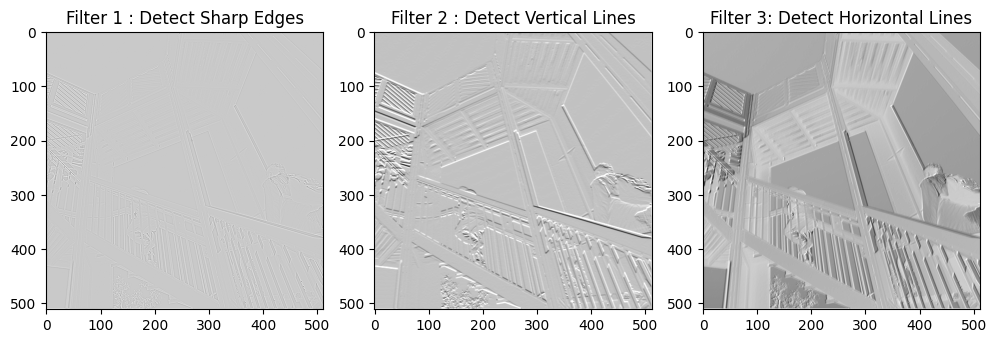

In [26]:
plt.figure( figsize = (10,10))

plt.gray()
plt.subplot(1,3,1)
plt.imshow(i)
plt.title("Filter 1 : Detect Sharp Edges")

plt.gray()
plt.subplot(1,3,2)
plt.imshow(i_2)
plt.title("Filter 2 : Detect Vertical Lines")

plt.gray()
plt.subplot(1,3,3)
plt.imshow(i_3)
plt.title("Filter 3: Detect Horizontal Lines")

plt.tight_layout()

plt.show()

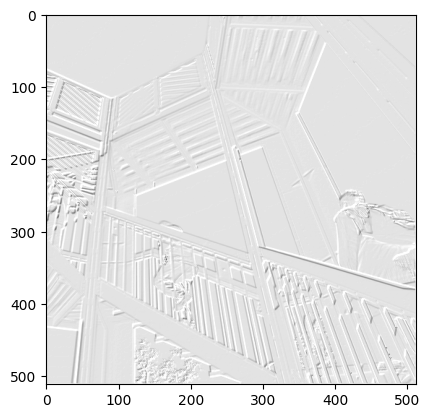

In [29]:
i_4 = conv2D( image , [[-3,-2,1],[-5,4,-2],[4,-2,5]])
plt.imshow(i_4)

In [32]:
def maxPooling2D(image):
  X = image.shape[0]
  Y = image.shape[1]

  new_image = np.zeros((int(X/2) , int(Y/2)))

  for x in range(0 , X , 2):
    for y in range( 0 , Y , 2):
      new_image[(int(x/2) , int(y/2))]  = max(image[x,y] ,image[x+1,y] ,image[x+1,y+1],image[x,y+1] )
  return new_image

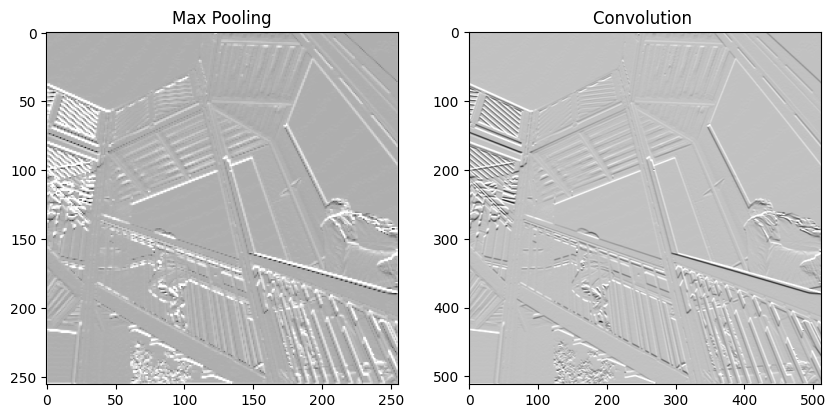

In [41]:
i_5 = maxPooling2D(i_2)

plt.figure( figsize = (10,10))

plt.subplot( 1,2,1 )
plt.gray()
plt.title("Max Pooling")
plt.imshow(i_5)
plt.grid(False)


plt.subplot( 1,2,2 )
plt.gray()
plt.title("Convolution ")
plt.imshow(i_2)
plt.grid(False)
plt.show()
